In [1]:
import pandas as pd
import json
import os

import sys
sys.path.append('../')

import dft_descriptors.numbering_CO as nb
from rdkit import Chem
from dft_descriptors.dft_featurize import *

from aqc_utils.molecule import molecule
from aqc_utils.db_functions import *
from aqc_utils.openbabel_functions import *

import hashlib
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
df_hte_bh = pd.read_excel("Dreher_and_Doyle_input_data.xlsx")

In [3]:
df_hte_bh

,Ligand,Additive,Base,Aryl halide,Output
0,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,CC1=CC(C)=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,ClC1=NC=CC=C1,70.410458
1,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,O=C(OC)C1=CC=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,BrC1=NC=CC=C1,11.064457
2,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C3CCCCC3)...,O=C(OC)C1=CC=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,IC1=CC=C(CC)C=C1,10.223550
3,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CCOC(C1=CON=C1)=O,CN1CCCN2C1=NCCC2,ClC1=CC=C(C(F)(F)F)C=C1,20.083383
4,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,CC1=CC(C)=NO1,CN1CCCN2C1=NCCC2,ClC1=CC=C(OC)C=C1,0.492663
...,...,...,...,...,...
3950,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C3CCCCC3)...,C1(C2=CC=CC=C2)=CON=C1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,BrC1=CC=C(OC)C=C1,4.344677
3951,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CC1=CC(N2C=CC=C2)=NO1,CN1CCCN2C1=NCCC2,BrC1=CC=C(OC)C=C1,47.156275
3952,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CCOC(C1=CON=C1)=O,CC(C)(C)/N=C(N(C)C)/N(C)C,ClC1=CC=C(C(F)(F)F)C=C1,0.701552
3953,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,C1(N(CC2=CC=CC=C2)CC3=CC=CC=C3)=CC=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,ClC1=CC=C(C(F)(F)F)C=C1,15.561565


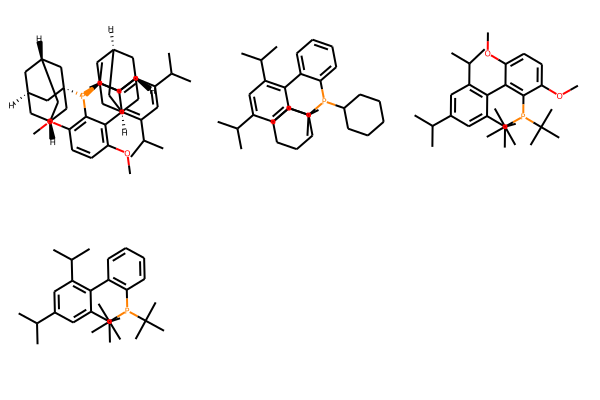

In [4]:
ligs = df_hte_bh["Ligand"].unique()
lig_mol = [Chem.MolFromSmiles(L) for L in ligs]
Chem.Draw.MolsToGridImage(lig_mol)

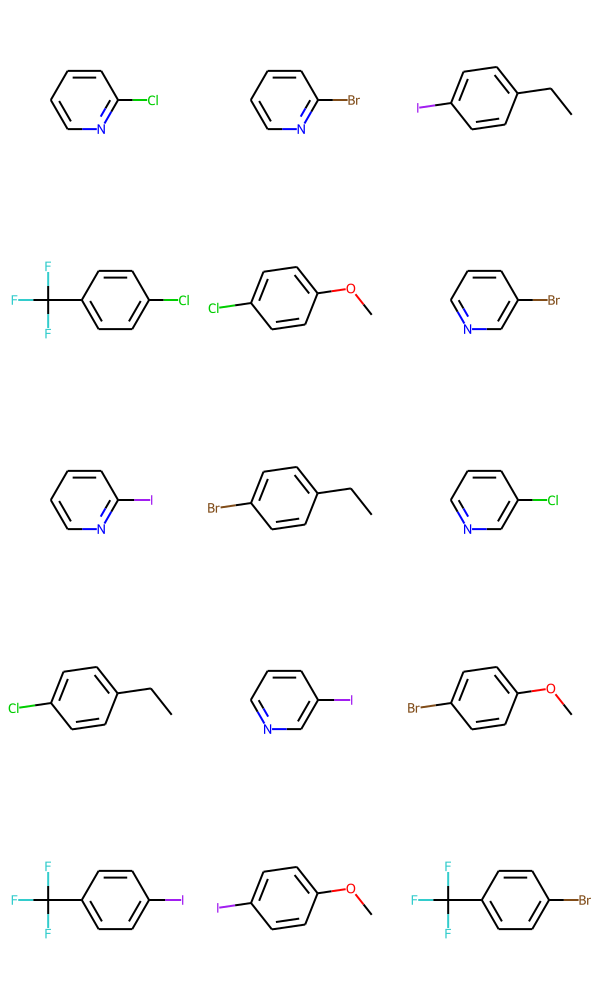

In [5]:
ArX = df_hte_bh["Aryl halide"].unique()
ArX_mol = [Chem.MolFromSmiles(L) for L in ArX]
Chem.Draw.MolsToGridImage(ArX_mol)

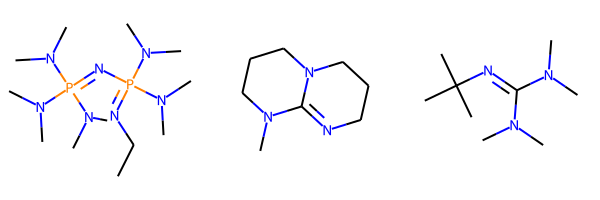

In [6]:
base = df_hte_bh["Base"].unique()
base_mol = [Chem.MolFromSmiles(L) for L in base]
Chem.Draw.MolsToGridImage(base_mol)

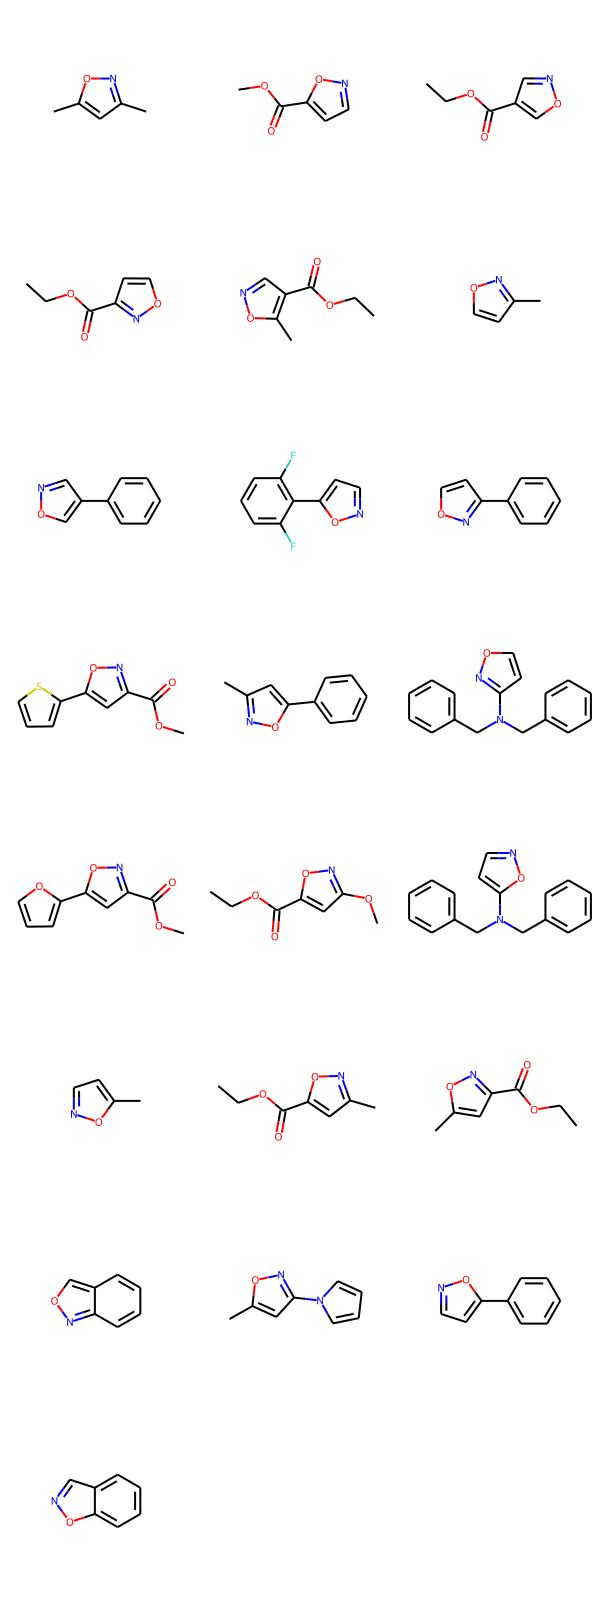

In [7]:
additive = df_hte_bh["Additive"].unique()
add_mol = [Chem.MolFromSmiles(L) for L in additive]
Chem.Draw.MolsToGridImage(add_mol)

In [8]:
mol_df = db_select_molecules()
#mol_df.to_csv("../data_csv/mol_df.csv", sep=',',index=False)
#mol_df = pd.read_csv("../data_csv/mol_df.csv", sep=',')

/Users/julesschleinitz/Desktop/These/Projet_stage_M1_Max/Code/SM_DFT/DFT_for_SM/HTE_vs_Literature/../aqc_utils/db_functions.py:167: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = pd.concat([grouped['metadata', 'molecule_id', 'name'].first(),


In [ ]:
#Step 1 : generate num_df for each class : num_Base_HTE.csv, 
# num_Additive_HTE.csv, num_ligands_HTE.csv, num_ArylHalide_HTE.csv
#Step 2 : 

In [9]:
import pandas as pd
import os
import sys
sys.path.append('../')

from rdkit import Chem
import dft_descriptors.numbering_CO as nb
import dft_descriptors.prepocessing as pp
from aqc_utils.molecule import molecule
from aqc_utils.db_functions import *
from aqc_utils.openbabel_functions import *


import hashlib
import logging
logging.basicConfig(level=logging.INFO)

    # path for file storage
path = '/Users/julesschleinitz/Desktop/These/Projet_stage_M1_Max/Code/SM_DFT/DFT_for_SM/log_data'
    
def generates_descriptors(mol_df, parameter):
    
    """ parameter indicates the member of the reaction you want to generate descriptors """
    
    # keep the infos on the parameter you need
    tags_coll = db_connect("tags")
    mols_coll = db_connect("molecules")
    log_files_coll = db_connect("log_files")
    
    data_df = pd.read_csv('Dreher_and_Doyle_input_data.xlsx', sep = ',') 
    data_df = pp.preprocess(data_df)
    
    if parameter == "Substrate":
        unik_smi = np.unique(data_df["Aryl halide"].tolist())
        can_smis = np.unique([Chem.CanonSmiles(smi) for smi in unik_smi])
        num_df = pd.read_csv('num_ArylHalide_HTE.csv')
        
    elif parameter == "Ligand":
        data_df = data_df[data_df['Ligand'].notna()]
        unik_lig = np.unique(data_df["Ligand"])
        can_smis = np.unique([Chem.CanonSmiles(smi) for smi in unik_lig])
        num_df = pd.read_csv("num_ligands_HTE.csv")
    
    elif parameter == "Additive":
        data_df = data_df[data_df['Additive'].notna()]
        unik_lig = [i for i in np.unique(data_df['Additive'])]
        can_smis = np.unique([Chem.CanonSmiles(smi) for smi in unik_lig])
        num_df = pd.read_csv("num_Additive_HTE.csv")
        
    elif parameter == "Base":
        data_df = data_df[data_df['Base'].notna()]
        can_smis = [i for i in np.unique(data_df['Base'])]
        num_df = pd.read_csv("num_Base_HTE.csv")
        
    
    # drop molecules that you don't want
    mol_sub_df = drop_non_needed_mols(mol_df, can_smis)
    
    print("we have ", len(mol_sub_df), " molecules to extract")
    # add fs_name to the table
    mol_sub_df['file_base_name'] = mol_sub_df['can'].map(mol_fs_name)
    X = [Chem.CanonSmiles(list(mol_sub_df["can"])[i]) for i in range(len(mol_sub_df))]
    mol_sub_df['can_rdkit'] = X
    

    # get a cursor that iterates over the log files    
    cursor = log_files_coll.find({'molecule_id' : {"$in": mol_sub_df.molecule_id.to_list()}}, {'log': 1, 'can': 1})

    N = 0
    for l in cursor:
        can, log = l['can'], l['log']
        fs_name = mol_fs_name(can) 
        smi_obabel, smi_shared = get_smis(can, mol_sub_df, num_df)
        shared_to_obabel = shared_to_obabel_idx(smi_shared, smi_obabel, parameter)   
        mol_desc = get_moldescriptors(can, log, fs_name, shared_to_obabel, parameter)
        if N == 0:
            full_df = mol_desc
        else:
            full_df = full_df.append(mol_desc)
        N += 1
    
    return full_df     
        
def get_moldescriptors(can, log, fs_name, shared_to_obabel, parameter):
    print(fs_name)
    with open(f"{path}/{fs_name}_0.log", "w") as f:
        f.write(log)
        log_name = f"{path}/{fs_name}_0.log"
        extractor = gaussian_log_extractor(log_name)
        extractor.__init__
        mol_descriptors = extractor.get_descriptors()
        dict_global = mol_descriptors['descriptors']
        atom_descriptors = mol_descriptors['atom_descriptors'] 
        dict_atoms = select_at_desc(shared_to_obabel, atom_descriptors, parameter)
        dict_global.update(dict_atoms)
        dict_trans = get_transitions(mol_descriptors['transitions'])
        dict_global.update(dict_trans)
        dict_labels = get_labels(shared_to_obabel, mol_descriptors['labels'], parameter)
        dict_global.update(dict_labels)
        df = pd.DataFrame.from_dict(dict_global, orient ='index', columns=[f"{can}"]).T
        os.remove(log_name)
    return df

def select_at_desc(shared_to_obabel, atom_descriptors, parameter):
    if parameter == 'Substrate':
        n = 7
    elif parameter == 'Ligand':
        n = 4
    elif parameter == 'Base':
        n = 1
    elif parameter == 'Additive':
        n = 5
    select_at_descriptors = dict()
    for key in atom_descriptors.keys():
        key_d = atom_descriptors[key]
        reduced_descriptor = [key_d[shared_to_obabel[i]] for i in range(n)]
        for i in range(len(reduced_descriptor)):
            select_at_descriptors.update({str(key + f"_{i}"): reduced_descriptor[i]})
    return select_at_descriptors

def get_transitions(transitions):
    transitions_d = dict()
    for key in transitions.keys():
        key_d = transitions[key]
        for i in range(len(key_d)):
            transitions_d.update({str(key + f"_{i}"): key_d[i]})
    return transitions_d

def get_labels(shared_to_obabel, labels, parameter):
    if parameter == 'Substrate':
        n = 7
    elif parameter == 'Ligand':
        n = 4
    elif parameter == 'Base':
        n = 1
    elif parameter == 'Additive':
        n = 5
    ret_labels = dict()
    reduced_labels = [labels[shared_to_obabel[i]] for i in range(n)]
    for i in range(len(reduced_labels)):
        ret_labels.update({f"at_{i}" : reduced_labels[i]})
    return ret_labels  

def drop_non_needed_mols(mol_df, can_smis):
    idx_todrop = []
    can_db = []
    for j, smi in enumerate(mol_df["can"]):
        try:
            can_smi = Chem.CanonSmiles(smi)
            if can_smi not in can_smis:
                idx_todrop.append(j)
            else:
                can_db.append((smi, can_smi))
        except:
            print(smi)
            idx_todrop.append(j)
        
    good_df = mol_df.drop(axis=0, index=idx_todrop)
    
    return good_df


# return smi_shared and smi_obabel for smi from dataframe
def get_smis(smi, obabel_df, num_df):
    smi_obabel = list(obabel_df["can"])[list(obabel_df["can_rdkit"]).index(Chem.CanonSmiles(smi))]
    smi_shared = list(num_df["C0C7_num"])[list(num_df["react"]).index(Chem.CanonSmiles(smi))]
    return smi_obabel, smi_shared

# returns the indexes of the autqchem atoms to extract for CO substrates
def shared_to_obabel_idx(smi_shared, smi_obabel, parameter):
    s_t_r = shared_to_rdkit_can(smi_shared)
    r_t_o = rdkit_to_obabel_can(smi_obabel)
    s_t_o = []
    if parameter == 'Substrate':
        for i in range(7):
            idx_rdkit = s_t_r[i][1]
            idx_obabel = r_t_o[idx_rdkit][1]
            #couple = (i, idx_obabel)
            s_t_o.append(idx_obabel)
            
    elif parameter == 'Base':
        idx_rdkit = s_t_r[0][1]
        idx_obabel = r_t_o[idx_rdkit][1]
        s_t_o.append(idx_obabel)
            
    elif parameter == 'Ligand':
        for i in range(4):
            idx_rdkit = s_t_r[i][1]
            idx_obabel = r_t_o[idx_rdkit][1]
            s_t_o.append(idx_obabel)

    elif parameter == 'Additive':
        for i in range(5):
            idx_rdkit = s_t_r[i][1]
            idx_obabel = r_t_o[idx_rdkit][1]
            s_t_o.append(idx_obabel)
                       
    return s_t_o

def shared_to_rdkit_can(smi_shared):
    atmaptidx = [] 
    m = Chem.MolFromSmiles(smi_shared, Chem.rdmolops.AddHs==True)
    m = num_AddHs(m)
    for a in m.GetAtoms():
        a.SetProp("foo", str(a.GetAtomMapNum()))
    remove_at_map(m)
    # get the atoms in the smiles string order
    order = m.GetPropsAsDict(True,True)["_smilesAtomOutputOrder"]
    # print("canonical order:", list(order))
    m_canonical = Chem.RenumberAtoms(m, order)
    for a in m_canonical.GetAtoms():
        atmaptidx.append((int(a.GetProp("foo")), a.GetIdx()))
    atmaptidx.sort(key=takeFirst)
    return atmaptidx

def rdkit_to_obabel_can(smi_obabel):
    atmaptidx = [] 
    m = nb.mol_with_atom_index(Chem.MolFromSmiles(smi_obabel))
    m = Chem.rdmolops.AddHs(m)
    m = nb.mol_with_atom_index(m)
    
    for a in m.GetAtoms():
        a.SetProp("foo", str(a.GetIdx()))
    remove_at_map(m)
    # get the atoms in the smiles string order
    order = m.GetPropsAsDict(True,True)["_smilesAtomOutputOrder"]
    # print("canonical order:", list(order))
    m_canonical = Chem.RenumberAtoms(m, order)
    for a in m_canonical.GetAtoms():
        atmaptidx.append((a.GetIdx(), int(a.GetProp("foo"))))
    return atmaptidx


def remove_at_map(mol):
    for at in mol.GetAtoms():
        at.SetAtomMapNum(0)
    return Chem.MolFromSmiles(Chem.MolToSmiles(mol), Chem.rdmolops.AddHs==True)

# helper function to create file names the same way ACQ does
def mol_fs_name(can):
    mol = input_to_OBMol(can, "string", "smi")
    return f"{mol.GetFormula()}_{hashlib.md5(can.encode()).hexdigest()[:4]}"

def takeFirst(elem):
    return elem[0]

In [16]:
canon_additive = [Chem.CanonSmiles(smi) for smi in additive]

In [145]:
num_additives = ['[C:6][c:2]1[cH:3][c:4]([CH3:5])[o:0][n:1]1',
                 '[CH3:8][O:7][C:6](=[O:5])[c:4]1[cH:3][cH:2][n:1][o:0]1',
                 '[CH3:9][CH2:8][O:7][C:6](=[O:5])[c:3]1[cH:2][n:1][o:0][cH:4]1',
                 '[CH3:9][CH2:8][O:7][C:6](=[O:5])[c:2]1[cH:3][cH:4][o:0][n:1]1',
                 '[CH3:10][CH2:9][O:8][C:7](=[O:6])[c:3]1[cH:2][n:1][o:0][c:4]1[CH3:5]',
                 '[CH3:5][c:2]1[cH:3][cH:4][o:0][n:1]1',
                 '[cH:10]1[cH:9][cH:8][c:7](-[c:3]2[cH:2][n:1][o:0][cH:4]2)[cH:5][cH:6]1',
                 '[F:12][c:11]1[cH:10][cH:9][cH:8][c:7]([F:6])[c:5]1-[c:4]1[cH:3][cH:2][n:1][o:0]1',
                 '[cH:10]1[cH:9][cH:8][c:7](-[c:2]2[cH:3][cH:4][o:0][n:1]2)[cH:5][cH:6]1',
                 '[CH3:13][O:5][C:6](=[O:12])[c:2]1[cH:3][c:4](-[c:7]2[cH:8][cH:9][cH:10][s:11]2)[o:0][n:1]1',
                 '[CH3:11][c:2]1[cH:3][c:4](-[c:10]2[cH:5][cH:6][cH:7][cH:8][cH:9]2)[o:0][n:1]1',
                 '[cH:5]1[cH:17][cH:16][c:15]([CH2:14][N:13]([CH2:6][c:7]2[cH:8][cH:9][cH:10][cH:11][cH:12]2)[c:2]2[cH:3][cH:4][o:0][n:1]2)[cH:18][cH:19]1',
                 '[CH3:5][O:6][C:12](=[O:13])[c:2]1[cH:3][c:4](-[c:7]2[cH:8][cH:9][cH:10][o:11]2)[o:0][n:1]1',
                 '[CH3:7][CH2:6][O:5][C:11](=[O:10])[c:4]1[cH:3][c:2]([O:8][CH3:9])[n:1][o:0]1',
                 '[cH:17]1[cH:16][cH:15][c:14]([CH2:13][N:5]([CH2:6][c:7]2[cH:8][cH:9][cH:10][cH:11][cH:12]2)[c:4]2[cH:3][cH:2][n:1][o:0]2)[cH:18][cH:19]1',
                 '[CH3:5][c:4]1[cH:3][cH:2][n:1][o:0]1',
                 '[CH3:10][CH2:9][O:7][C:6](=[O:5])[c:4]1[cH:3][c:2]([CH3:8])[n:1][o:0]1',
                 '[CH3:10][CH2:9][O:7][C:6](=[O:5])[c:2]1[cH:3][c:4]([CH3:8])[o:0][n:1]1',
                 '[cH:7]1[cH:6][cH:5][c:2]2[n:1][o:0][cH:4][c:3]2[cH:8]1',
                 '[CH3:5][c:4]1[cH:3][c:2](-[n:6]2[cH:7][cH:8][cH:9][cH:10]2)[n:1][o:0]1',
                 '[cH:8]1[cH:7][cH:6][c:5](-[c:4]2[cH:3][cH:2][n:1][o:0]2)[cH:9][cH:10]1',
                 '[cH:7]1[cH:6][cH:5][c:4]2[o:0][n:1][cH:2][c:3]2[cH:8]1',   
                ]

In [146]:
num_additives_df = pd.DataFrame(columns=['react', 'C0C7_num'])
num_additives_df['react'] = canon_additive
num_additives_df['C0C7_num'] = num_additives

In [150]:
num_additives_df.to_csv('num_Additive_HTE.csv')

In [152]:
canonArX = [Chem.CanonSmiles(smi) for smi in ArX]

In [216]:
num_ArX = ['Cl[c:1]1[cH:2][cH:3][cH:4][cH:5][n:6]1',
           'Br[c:1]1[cH:2][cH:3][cH:4][cH:5][n:6]1',
           '[CH3:8][CH2:7][c:4]1[cH:3][cH:2][c:1](I)[cH:6][cH:5]1',
           '[F:8][C:7]([F:9])([F:10])[c:4]1[cH:3][cH:2][c:1](Cl)[cH:6][cH:5]1',
           '[CH3:8][O:7][c:4]1[cH:3][cH:2][c:1](Cl)[cH:6][cH:5]1',
           'Br[c:1]1[cH:2][cH:3][cH:4][n:5][cH:6]1',
           'I[c:1]1[cH:2][cH:3][cH:4][cH:5][n:6]1',
           '[CH3:8][CH2:7][c:4]1[cH:3][cH:2][c:1](Br)[cH:6][cH:5]1',
           'Cl[c:1]1[cH:2][cH:3][cH:4][n:5][cH:6]1',
           '[CH3:8][CH2:7][c:4]1[cH:3][cH:2][c:1](Cl)[cH:6][cH:5]1',
           'I[c:1]1[cH:2][cH:3][cH:4][n:5][cH:6]1',
           '[CH3:8][O:7][c:4]1[cH:3][cH:2][c:1](Br)[cH:6][cH:5]1',
           '[F:8][C:7]([F:9])([F:10])[c:4]1[cH:3][cH:2][c:1](I)[cH:6][cH:5]1',
           '[CH3:8][O:7][c:4]1[cH:3][cH:2][c:1](I)[cH:6][cH:5]1',
           '[F:8][C:7]([F:9])([F:10])[c:4]1[cH:3][cH:2][c:1](Br)[cH:6][cH:5]1',
]

In [217]:
num_ArX_df = pd.DataFrame(columns=['react', 'C0C7_num'])
num_ArX_df['react'] = canonArX
num_ArX_df['C0C7_num'] = num_ArX

In [218]:
num_ArX_df.to_csv('num_ArylHalide_HTE.csv')

In [220]:
canonBase = [Chem.CanonSmiles(smi) for smi in base]

In [234]:
num_Base = ['[CH3:4][CH2:1][N:2]=[P:3]([N:0]=[P:5]([N:6]([CH3:7])[CH3:8])([N:9]([CH3:10])[CH3:11])[N:12]([CH3:13])[CH3:14])([N:15]([CH3:16])[CH3:17])[N:18]([CH3:19])[CH3:20]',
            '[CH3:9][N:1]1[CH2:2][CH2:3][CH2:4][N:5]2[CH2:6][CH2:7][CH2:8][N:0]=[C:10]12',
            '[CH3:4][N:1]([CH3:2])[C:3](=[N:0][C:5]([CH3:6])([CH3:7])[CH3:8])[N:9]([CH3:10])[CH3:11]']

In [235]:
num_Base_df = pd.DataFrame(columns=['react', 'C0C7_num'])
num_Base_df['react'] = canonBase
num_Base_df['C0C7_num'] = num_Base

In [236]:
num_ArX_df.to_csv('num_Base_HTE.csv')

In [239]:
canonLigands = [Chem.CanonSmiles(smi) for smi in ligs]
canonLigands

['COc1ccc(OC)c(P([C@]23C[C@H]4C[C@H](C[C@H](C4)C2)C3)[C@]23C[C@H]4C[C@H](C[C@H](C4)C2)C3)c1-c1c(C(C)C)cc(C(C)C)cc1C(C)C',
 'CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2)c(C(C)C)c1',
 'COc1ccc(OC)c(P(C(C)(C)C)C(C)(C)C)c1-c1c(C(C)C)cc(C(C)C)cc1C(C)C',
 'CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)C(C)(C)C)c(C(C)C)c1']

In [ ]:
num_Ligands = []

In [219]:
# to do == number ligands and base and then test moldescriptors generators

In [ ]:
#num_ligands_HTE.csv

In [240]:
smi = smi_with_atom_num('COc1ccc(OC)c(P([C@]23C[C@H]4C[C@H](C[C@H](C4)C2)C3)[C@]23C[C@H]4C[C@H](C[C@H](C4)C2)C3)c1-c1c(C(C)C)cc(C(C)C)cc1C(C)C')
print(smi)

C[O:1][c:2]1[cH:3][cH:4][c:5]([O:6][CH3:7])[c:8]([P:9]([C@:10]23[CH2:11][C@H:12]4[CH2:13][C@H:14]([CH2:15][C@H:16]([CH2:17]4)[CH2:18]2)[CH2:19]3)[C@:20]23[CH2:21][C@H:22]4[CH2:23][C@H:24]([CH2:25][C@H:26]([CH2:27]4)[CH2:28]2)[CH2:29]3)[c:30]1-[c:31]1[c:32]([CH:33]([CH3:34])[CH3:35])[cH:36][c:37]([CH:38]([CH3:39])[CH3:40])[cH:41][c:42]1[CH:43]([CH3:44])[CH3:45]


In [231]:
smi = 'C[O:1][c:2]1[cH:3][cH:4][c:5]([O:6][CH3:7])[c:1]([P:0]([C@:2]23[CH2:11][C@H:12]4[CH2:13][C@H:14]([CH2:15][C@H:16]([CH2:17]4)[CH2:18]2)[CH2:19]3)[C@:20]23[CH2:21][C@H:22]4[CH2:23][C@H:24]([CH2:25][C@H:26]([CH2:27]4)[CH2:28]2)[CH2:29]3)[c:30]1-[c:31]1[c:32]([CH:33]([CH3:34])[CH3:35])[cH:36][c:37]([CH:38]([CH3:39])[CH3:40])[cH:41][c:42]1[CH:43]([CH3:44])[CH3:45]'

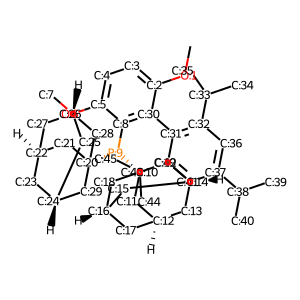

In [241]:
Chem.Draw.MolToImage(Chem.MolFromSmiles(smi))

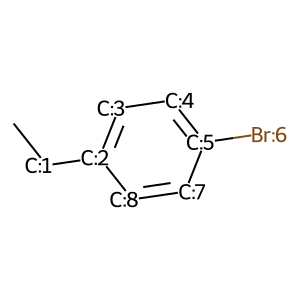

In [187]:
Chem.Draw.MolToImage(Chem.MolFromSmiles(smi))

In [20]:
def smi_with_atom_num(smi):
    mol = Chem.MolFromSmiles(smi)
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return Chem.MolToSmiles(mol)

In [144]:
smi = smi_with_atom_num(canon_additive[22])
print(smi)

IndexError: list index out of range

In [142]:
smi= '[cH:7]1[cH:6][cH:5][c:4]2[o:0][n:1][cH:2][c:3]2[cH:8]1'

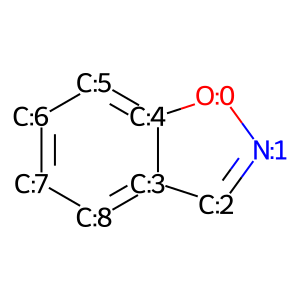

In [143]:
Chem.Draw.MolToImage(Chem.MolFromSmiles(smi))

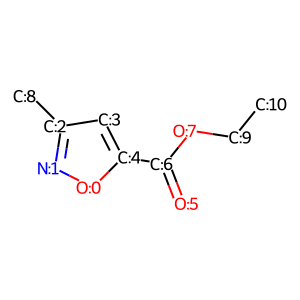

In [117]:
Chem.Draw.MolToImage(Chem.MolFromSmiles('[CH3:10][CH2:9][O:7][C:6](=[O:5])[c:4]1[cH:3][c:2]([CH3:8])[n:1][o:0]1'))